In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [2]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [4]:
con_value_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
numeric_cars = cars[con_value_cols]

In [5]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# Since we're most interested in price, any rows with empty price values will be removed
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = price_col

In [10]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Model (K-Nearest Neighbors)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows by reindexing
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into training and test sets of equal size
    # The first half will be training, and second half will be test
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df  = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model with default value for k (5)
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = dict()
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_value

rmse_results = pd.Series(rmse_results)
rmse_results.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [12]:
def knn_train_test(train_col, target_col, df):
    # Randomize order of rows by reindexing
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into training and test sets of equal size
    # The first half will be training, and second half will be test
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df  = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = dict()
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        # Fit a KNN model with default value for k (5)
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        # Make predictions using model
        predicted_labels = knn.predict(test_df[[train_col]])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = dict()

train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_value

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.5628056435012,
  5: 3238.4628296477176,
  7: 3563.0867742564151,
  9: 3831.8244149840766},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.

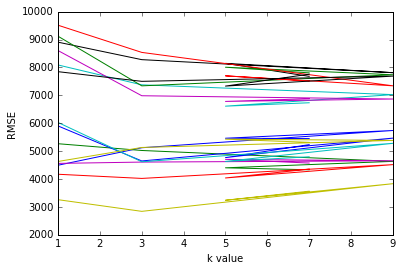

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate Model (K-Nearest Neighbors)

In [14]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = dict()
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
def knn_train_test(train_cols, target_col, df):
    # Randomize order of rows by reindexing
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into training and test sets of equal size
    # The first half will be training, and second half will be test
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df  = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = dict()
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        # Fit a KNN model with default value for k (5)
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # Make predictions using model
        predicted_labels = knn.predict(test_df[train_cols])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = dict()

two_best_features = ['engine-size','horsepower']
rmse_value = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results['two best features'] = rmse_value

three_best_feaures = ['engine-size', 'horsepower', 'width']
rmse_value = knn_train_test(three_best_feaures, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_value

four_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_value = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_value

five_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_value = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_value

k_rmse_results

{'five best features': {5: 3410.2170133901805},
 'four best features': {5: 3487.3409173270352},
 'three best features': {5: 3580.7376651928435},
 'two best features': {5: 2949.8817277180374}}

In [18]:
def knn_train_test(train_cols, target_col, df):
    # Randomize order of rows by reindexing
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into training and test sets of equal size
    # The first half will be training, and second half will be test
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df  = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = dict()
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        # Fit a KNN model with default value for k (5)
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # Make predictions using model
        predicted_labels = knn.predict(test_df[train_cols])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = dict()
two_best_features = ['engine-size','horsepower']
rmse_value = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results['two best features'] = rmse_value

three_best_feaures = ['engine-size', 'horsepower', 'width']
rmse_value = knn_train_test(three_best_feaures, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_value

four_best_features = ['engine-size', 'horsepower', 'width', 'curb-weight']
rmse_value = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_value

k_rmse_results

{'four best features': {1: 2952.7256865814711,
  2: 3131.7049527200179,
  3: 3129.6928219101551,
  4: 3241.4320776448717,
  5: 3487.3409173270352,
  6: 3637.0381471429987,
  7: 3606.1950778602859,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.5640504110743,
  12: 4289.4864909958214,
  13: 4368.0616027799424,
  14: 4416.3047729688014,
  15: 4434.0139143551714,
  16: 4441.4634909198785,
  17: 4512.9963037891266,
  18: 4523.5756297422276,
  19: 4534.8340652367924,
  20: 4620.2115981503666,
  21: 4688.3565095172926,
  22: 4731.4671777991298,
  23: 4763.535312989311,
  24: 4751.6013758724757},
 'three best features': {1: 3399.8148100410203,
  2: 3497.1911034230579,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.9430166735169,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.5939131338869,
  10: 4005.3548887151628,
  11: 4121.6872300616351,
  12: 4255.7006516242272,
  13: 4328.4768298952531,
  14: 4332.2

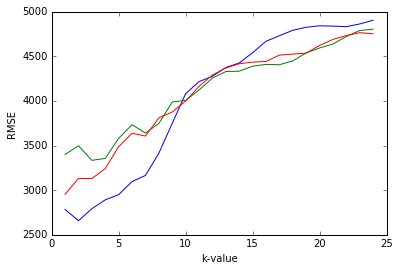

In [19]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')